# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [35]:
df = pd.read_csv("car_data.csv")
df.head()


# df1=df.drop(["Make","Make","Trim","Type"],axis="columns")
# df1=df1.drop("Model",axis="columns")
# df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [36]:
from sklearn.preprocessing import LabelEncoder
le_make = LabelEncoder()
le_model = LabelEncoder()
le_type = LabelEncoder()

In [37]:
df['Make_v'] = le_make.fit_transform(df['Make'])
df['Model_v'] = le_model.fit_transform(df['Model'])
df['Type_v'] = le_type.fit_transform(df['Type'])
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_v,Model_v,Type_v
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,0,10,3
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0,10,3
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0,10,3
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,0,10,3
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,5,21,3
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,5,21,3
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,5,21,3
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,5,21,3


In [38]:
df1=df.drop(["Make","Model","Type"],axis="columns")
df1

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_v,Model_v,Type_v
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,0,10,3
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,0,10,3
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,0,10,3
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,0,10,3
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,5,21,3
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,5,21,3
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,5,21,3
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,5,21,3


In [8]:
# mod=linear_model.LinearRegression()
# mod.fit(df1[["Mileage"]],df1["Price"])

LinearRegression()

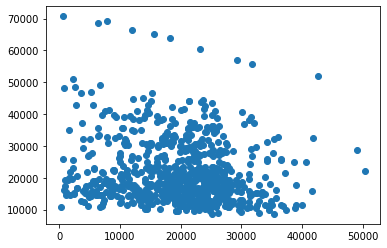

In [9]:
# plt.scatter(df1["Mileage"],df1["Price"])

In [10]:
# mod.score(df[["Mileage"]],df[["Price"]])

0.02046344732348926

In [39]:
 mod1=linear_model.LinearRegression()
 mod1.fit(df1[["Cylinder","Liter","Doors","Cruise","Sound","Leather","Make_v","Model_v","Type_v"]],df1["Price"])

LinearRegression()

In [40]:
 mod1.score(df1[["Cylinder","Liter","Doors","Cruise","Sound","Leather","Make_v","Model_v","Type_v"]],df1[["Price"]])

0.46551342418663855